# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
!pip install citipy

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = 'f770db4945148797f8807599ca7f54b9'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

       # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | mil'kovo
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | madang
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | klyuchi
Processing Record 9 of Set 1 | wailua homesteads
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | callao
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | kirensk
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | haiku-pauwela
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | taiohae
City not found. Skipping...
Processing Record 20 of Set 1 | rundu
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | alofi
Pr

Processing Record 39 of Set 4 | the bottom
Processing Record 40 of Set 4 | arawa
Processing Record 41 of Set 4 | mumbwa
Processing Record 42 of Set 4 | takamaka
City not found. Skipping...
Processing Record 43 of Set 4 | port lincoln
Processing Record 44 of Set 4 | sao paulo de olivenca
Processing Record 45 of Set 4 | port glaud
City not found. Skipping...
Processing Record 46 of Set 4 | fonte boa
Processing Record 47 of Set 4 | puerto baquerizo moreno
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | sisimiut
Processing Record 0 of Set 5 | buka
Processing Record 1 of Set 5 | camarinas
Processing Record 2 of Set 5 | saint joseph
Processing Record 3 of Set 5 | venev
Processing Record 4 of Set 5 | fale old settlement
Processing Record 5 of Set 5 | umm kaddadah
Processing Record 6 of Set 5 | napili-honokowai
Processing Record 7 of Set 5 | walvis bay
Processing Record 8 of Set 5 | queenstown
Processing Record 9 of Set 5 | puerto madero
Processing Record 10 of Set 5 

Processing Record 29 of Set 8 | corner brook
Processing Record 30 of Set 8 | champerico
Processing Record 31 of Set 8 | bonthe
Processing Record 32 of Set 8 | east london
Processing Record 33 of Set 8 | enshi
Processing Record 34 of Set 8 | leutkirch
Processing Record 35 of Set 8 | yingchuan
Processing Record 36 of Set 8 | ulanhot
Processing Record 37 of Set 8 | angaur state
Processing Record 38 of Set 8 | trittau
Processing Record 39 of Set 8 | tezu
Processing Record 40 of Set 8 | pandan
Processing Record 41 of Set 8 | tres arroyos
Processing Record 42 of Set 8 | meadow lakes
Processing Record 43 of Set 8 | almus
Processing Record 44 of Set 8 | seoni
Processing Record 45 of Set 8 | south hedland
Processing Record 46 of Set 8 | camiri
Processing Record 47 of Set 8 | kyzyl-mazhalyk
Processing Record 48 of Set 8 | al kharijah
Processing Record 49 of Set 8 | reynoldsburg
Processing Record 0 of Set 9 | plettenberg bay
Processing Record 1 of Set 9 | sergeyevka
Processing Record 2 of Set 9 |

Processing Record 22 of Set 12 | nabire
Processing Record 23 of Set 12 | yelizovo
Processing Record 24 of Set 12 | iskateley
Processing Record 25 of Set 12 | saint croix
Processing Record 26 of Set 12 | harstad
Processing Record 27 of Set 12 | igarka
Processing Record 28 of Set 12 | zhangye
Processing Record 29 of Set 12 | tiszafoldvar
Processing Record 30 of Set 12 | hastings
Processing Record 31 of Set 12 | yangor
City not found. Skipping...
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | musay'id
City not found. Skipping...
Processing Record 34 of Set 12 | pingxiang
Processing Record 35 of Set 12 | yigo village
Processing Record 36 of Set 12 | tonj
Processing Record 37 of Set 12 | puente alto
-----------------------------
Data Retrieval Complete      
-----------------------------


In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-1.15,58,100,1.03,CA,1697597005
1,puerto natales,-51.7236,-72.4875,4.90,91,76,1.71,CL,1697597006
2,mil'kovo,55.6078,37.7956,4.08,84,33,5.63,RU,1697597006
3,papatowai,-46.5619,169.4708,15.13,59,82,7.99,NZ,1697597006
4,madang,-5.2246,145.7966,30.41,65,37,3.36,PG,1697597006


In [8]:
# Ensure the 'output_data' folder exists
if not os.path.exists('output_data'):
        os.makedirs('output_data')

# Save the DataFrame to a CSV file
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,-1.15,58,100,1.03,CA,1697597005
1,puerto natales,-51.7236,-72.4875,4.90,91,76,1.71,CL,1697597006
2,mil'kovo,55.6078,37.7956,4.08,84,33,5.63,RU,1697597006
3,papatowai,-46.5619,169.4708,15.13,59,82,7.99,NZ,1697597006
4,madang,-5.2246,145.7966,30.41,65,37,3.36,PG,1697597006


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

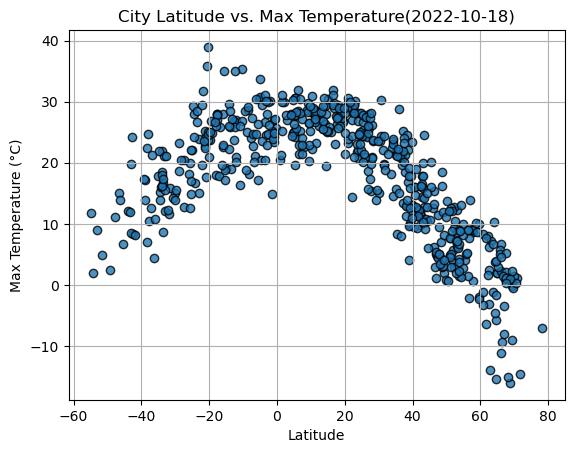

In [10]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature(2022-10-18)')
plt.ylabel('Max Temperature (°C)')
plt.xlabel('Latitude')
plt.grid(True)

# Ensure the 'output_data' folder exists
import os
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

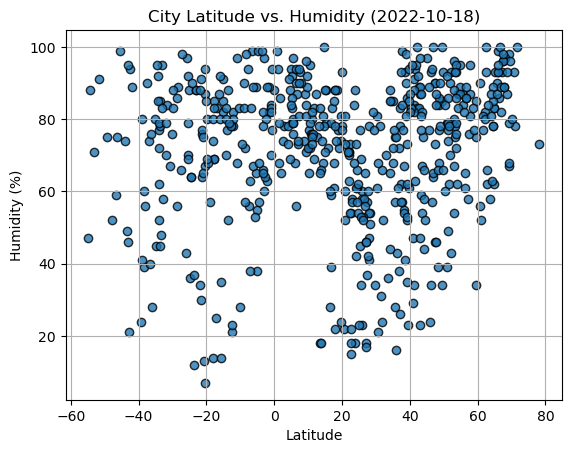

In [11]:
import matplotlib.pyplot as plt
import os

# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Ensure the 'output_data' folder exists
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

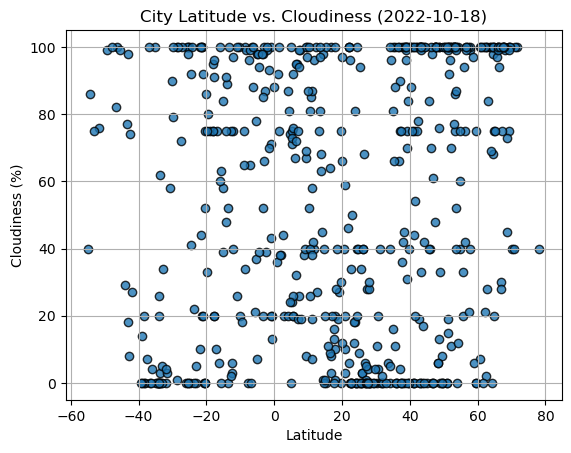

In [12]:
import matplotlib.pyplot as plt
import os

# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Ensure the 'output_data' folder exists
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

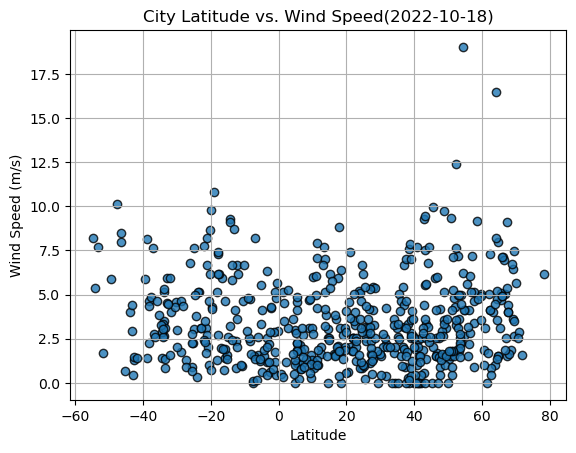

In [13]:
import matplotlib.pyplot as plt
import os

# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed(2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Ensure the 'output_data' folder exists
if not os.path.exists('output_data'):
    os.makedirs('output_data')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, text_coordinates):
    """
    Generate a linear regression plot.
    
    Parameters:
    - x_values: Values for the x-axis
    - y_values: Values for the y-axis
    - xlabel: Label for the x-axis
    - ylabel: Label for the y-axis
    - title: Title of the plot
    - text_coordinates: A tuple specifying where to display the linear regression equation on the plot
    """
    
    # Calculate the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot
    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=0.8)
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Display the r-value
    print(f"The r-value is: {rvalue:.2f}")
    
    # Show plot
    plt.show()


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
import pandas as pd

# Ensure your data is in a DataFrame
city_data_df = pd.DataFrame(city_data)

# Create Northern Hemisphere DataFrame
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,-1.15,58,100,1.03,CA,1697597005
2,mil'kovo,55.6078,37.7956,4.08,84,33,5.63,RU,1697597006
6,taoudenni,22.6783,-3.9836,29.49,15,0,3.26,ML,1697597007
7,klyuchi,52.2667,79.1667,9.37,43,11,3.26,RU,1697597007
8,wailua homesteads,22.0669,-159.3780,28.24,71,100,2.57,US,1697597007


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
import pandas as pd

# Ensure your data is in a DataFrame
city_data_df = pd.DataFrame(city_data)

# Create Southern Hemisphere DataFrame
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,puerto natales,-51.7236,-72.4875,4.90,91,76,1.71,CL,1697597006
3,papatowai,-46.5619,169.4708,15.13,59,82,7.99,NZ,1697597006
4,madang,-5.2246,145.7966,30.41,65,37,3.36,PG,1697597006
5,port elizabeth,-33.9180,25.5701,18.51,77,0,2.68,ZA,1697597007
9,waitangi,-43.9535,-176.5597,12.12,74,29,4.02,NZ,1697597007


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7875762182317759


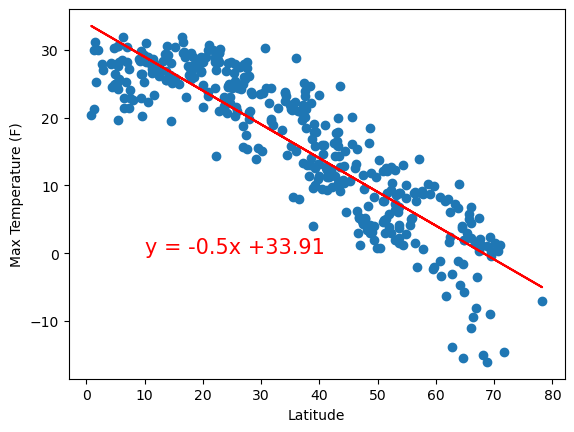

In [17]:
# Linear regression on Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming northern_hemi_df is your DataFrame
# and it has columns 'Lat' and 'Max Temp'

# x and y values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq, (10,0), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


The r-value is: 0.4762720033984136


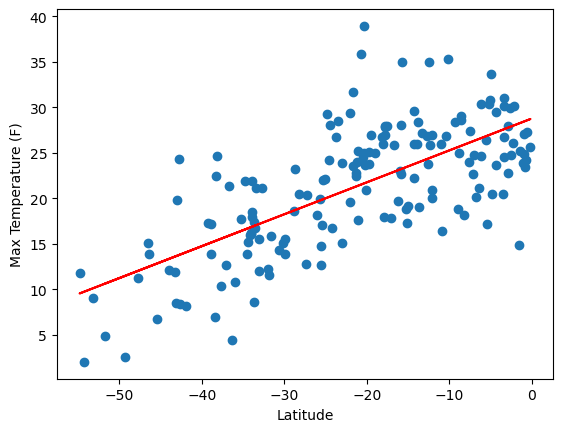

In [18]:
# Linear regression on Southern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd

# Assuming southern_hemi_df is your DataFrame
# and it has columns 'Lat' and 'Max Temp'

# x and y values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq, (-50,90), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {r_value**2}")

# Show plot
plt.show()


**Discussion about the linear relationship:** The Northern Hemisphere has a stronger linear relationship vs. the Southern Hemisphere based on the data points. The Southern Hemisphere has a weaker linear relationship based on the r-value. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.026043538217048356


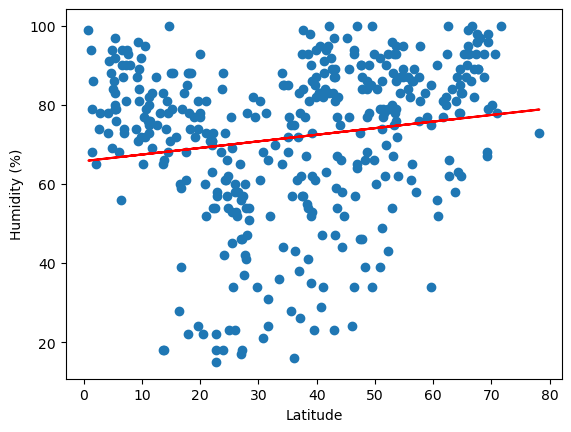

In [19]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extract relevant fields from the DataFrame for plotting.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


The r-value is: 0.01076336014015775


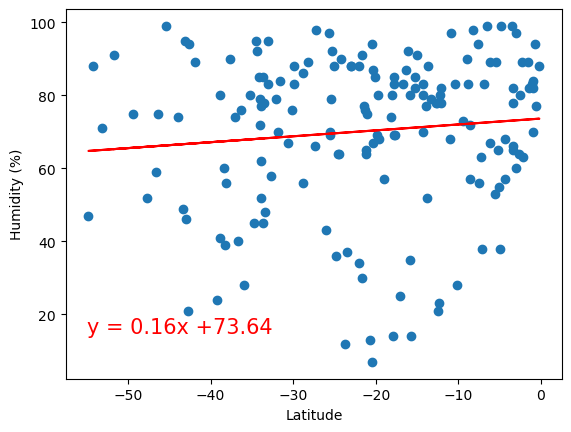

In [20]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq, (-55,15), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


**Discussion about the linear relationship:** In the Northern Hemisphere, as you move away from the equator, the humidity increases. Whereas as you move away from the equator in the Southern Hemisphere, the humidity decreases. Also, the Northern Hemisphere has a stronger linear relationship than the Southern Hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06151874344812669


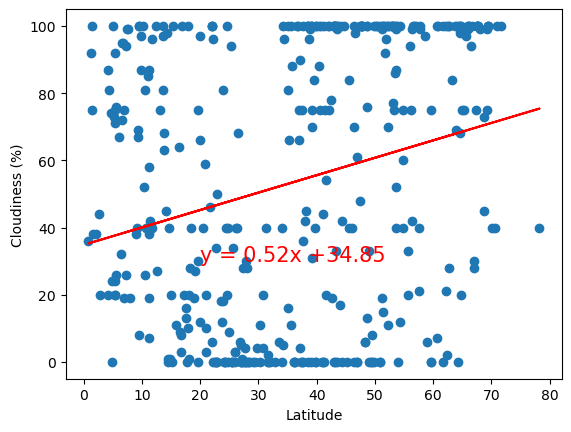

In [21]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extract relevant fields from the DataFrame for plotting.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (20,30), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


The r-value is: 0.04188393150333316


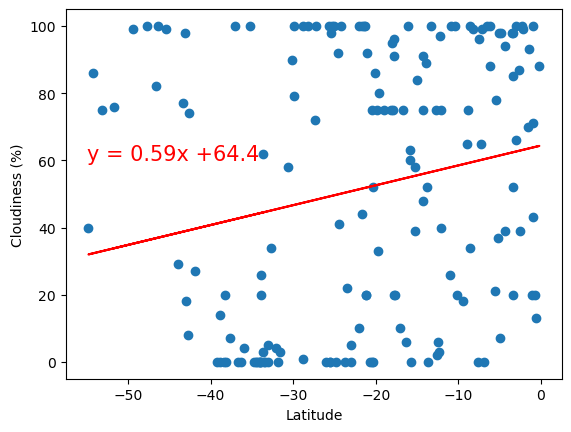

In [22]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the line for the graph.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq, (-55,60), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


**Discussion about the linear relationship:** The Northern Hemisphere is has a stronger linear relationship based on the r-value. Also, cloudiness in the Southern Hemisphere decreases as the latitude decreases.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.048722235445207374


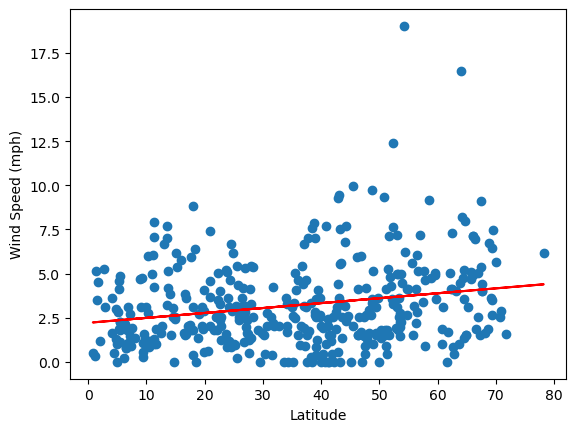

In [23]:
# Northern Hemisphere
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Extract relevant fields from the DataFrame for plotting.
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Calculate the regression line ("y values") for the predicted wind speed.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (10,25), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


The r-value is: 0.04124919052375335


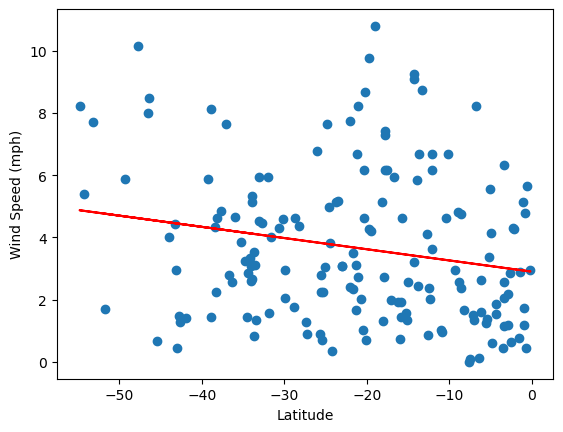

In [24]:
# Southern Hemisphere
# Extract relevant fields from the DataFrame for plotting.
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Create line equation string.
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Calculate the regression line ("y values") for the predicted wind speed.
regress_values = x_values * slope + intercept

# Create Plot.
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values,"r-")

# Label plot and annotate the line equation.
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq, (-50,20), fontsize=15, color="red")

# Print r value.
print(f"The r-value is: {r_value**2}")

# Show plot.
plt.show()


**Discussion about the linear relationship:** In the Northern and Southern Hemisphere, the wind speeds increase based on the regression line. In the Northern Hemisphere, the r-value suggests that the strength and direction is weaker whereas the Southern Hemisphere has a stronger r-value, suggesting that the relationship is stronger. 